In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset, inset_axes
import numpy as np
import pickle

import misc
from pulsars import Pulsars, c, e_charge, e_mass, h
import speiser_fun_cyl as sfc


In [2]:
#Ανάγνωση του λεξικού παραμέτρων
dir_path = 'data5'
with open('{}/par_dic.txt'.format(dir_path), 'rb') as par_dic:
    pdic = pickle.loads(par_dic.read())

In [3]:
#Έκχώρηση των παραμέτρων της προσωμοίωσης
k = pdic['multiplicity']
name = pdic['pulsar_name']
pulsar = Pulsars(k)[name]

gamma1 = 1.
B_0 = pdic['char magn field (Blc)']
omegaB = (e_charge*B_0/(e_mass*c))    #γυροσυχνότητα
Rlc = pdic['Radius of lc']
Delta = pdic['diss zone length']

gamma0 = pdic['initial lorentz factors']
init_pos = pdic['initial injection positions']

delta_init = pdic['diss zone width']    #πάχος του φύλλου ρεύματος, αδιάστατο, σε μονάδες [c/ωΒ]



T = pdic['runtime']
N = pdic['number of t points']
t = np.linspace(0.0, T*Delta, N)

pop = gamma0**(-1.)

In [4]:
%matplotlib notebook


In [5]:
#Τροχιά ενός ηλεκτρονίου
q = 1
charge = 'pos'

In [6]:
for w in range(len(init_pos)):

    vec = np.load('{}/cyl_{}_{}.npz'.format(dir_path, int(100*init_pos[w]), charge))
    r, ur, phi, uphi, z_cyl, uz_cyl = vec['r'], vec['ur'], vec['phi'], vec['uphi'], vec['z_cyl'], vec['uz_cyl']
    
    vec2 = np.load('{}/rc_nc_pr_{}_{}.npz'.format(dir_path, int(100*init_pos[w]), charge))
    r_curv, nu_crit, p_rad = vec2['r_curv'], vec2['nu_crit'], vec2['p_rad']
    
delta1 = np.zeros(len(r[0]))
for j in range(len(r[0])):
    delta1[j] = sfc.delta(r[0][j], Rlc, Delta, delta_init)
    if r[0][j] == Rlc + Delta:
        delta1[j] = np.Nan
        
for j in range(len(r[0])):
    if r[0][j] >= Rlc + Delta:
        print(j, t[j]/Delta)
        t_exit = t[j]
        exit_index = j
        break

177122 26.56832656832657


In [7]:
title_fs = 20
label_fs = 20
tick_fs = 20
text_fs = 20

el_col = 'r'
pos_col = 'xkcd:royal blue'
bound_color = 'k'
fill_color = 'xkcd:pale yellow'

<IPython.core.display.Javascript object>


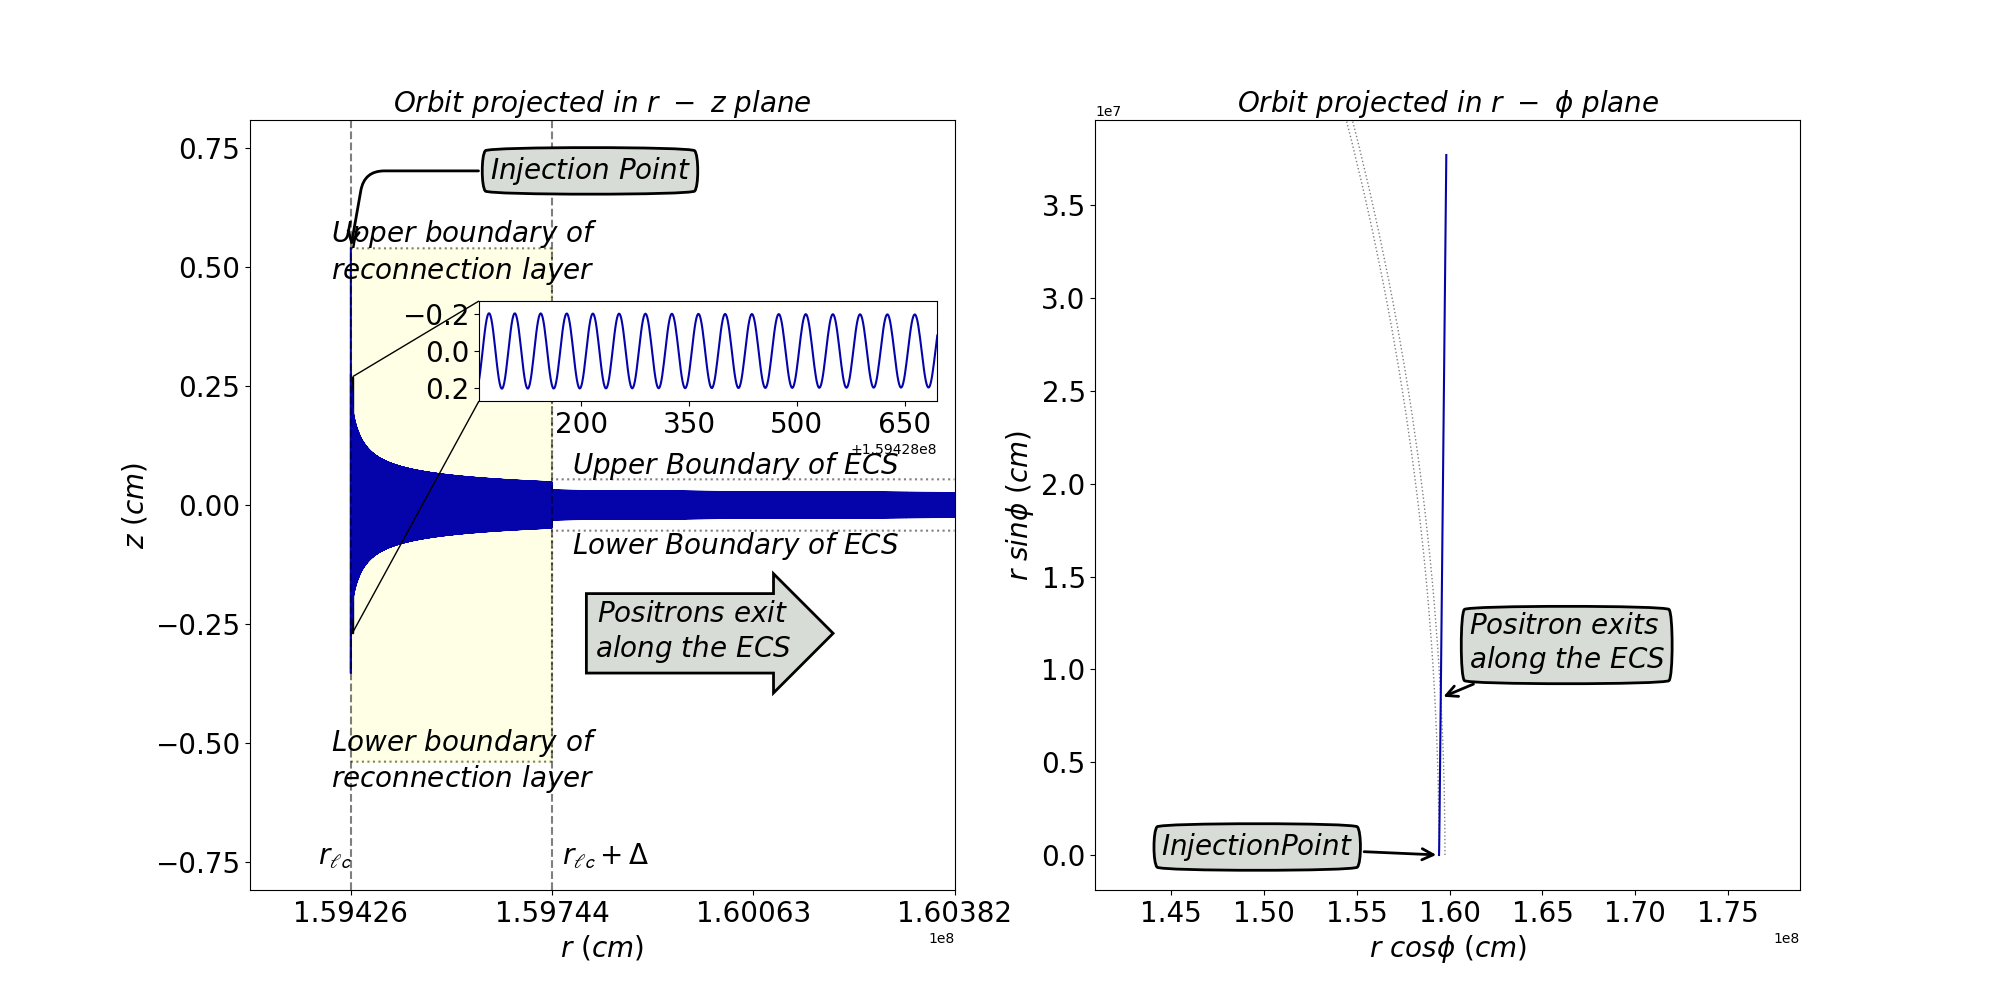

Text(0.5,1,'$Orbit \\ projected \\ in \\ r \\ - \\ z \\ plane$')

In [8]:
#Orbit of the particle

fig2, (ax2, ax1) = plt.subplots(1,2, figsize=(20, 10))

#########Τροχιά στο r-z επίπεδο############
ax2.plot(r[0]*c/omegaB, z_cyl[0]*c/omegaB, color = pos_col)

ax2.set_ylim([-1.5*delta_init*c/omegaB, 1.5*delta_init*c/omegaB])
ax2.set_xlim([(Rlc-0.5*Delta)*c/omegaB, (Rlc+3*Delta)*c/omegaB])

ax2.set_xlabel('$r \ (cm)$', fontsize = label_fs)
ax2.set_ylabel('$z \ (cm)$', fontsize = label_fs)
ax2.set_title('$Orbit \ projected \ in \ r \ - \ z \ plane$', fontsize = title_fs)





In [9]:
#τα όρια της περιοχής επιτάχυσνης

ax2.plot(r[0]*c/omegaB, delta1*c/omegaB, color = bound_color, linestyle = ':', alpha = 0.5)
ax2.plot(r[0]*c/omegaB, -delta1*c/omegaB, color = bound_color, linestyle = ':', alpha = 0.5)

ax2.axvline(x = Rlc*c/omegaB, linestyle = '--', color = bound_color, alpha = 0.5)
ax2.axvline(x = (Rlc + Delta)*c/omegaB, linestyle = '--', color = bound_color, alpha = 0.5)

In [10]:
ax2.xaxis.set_major_locator(plt.MultipleLocator(Delta*c/omegaB))
ax2.yaxis.set_major_locator(plt.MultipleLocator(min(delta1)*c/omegaB))
ax2.yaxis.set_major_locator(plt.MaxNLocator(8))
ax2.xaxis.set_tick_params(labelsize = tick_fs)
ax2.yaxis.set_tick_params(labelsize = tick_fs)

In [11]:
#Σήμαντικά σημεία


#σημείο εισόδου
ax2.annotate('$ Injection \ Point$', xy = (Rlc*c/omegaB, delta_init*c/omegaB), 
             xytext = (100, 50), textcoords = 'offset points', fontsize = text_fs,
             arrowprops=dict( arrowstyle = '->', connectionstyle = 'angle,angleA=0,angleB=80,rad=20', facecolor="black", 
                             lw = 2),
             bbox = dict(boxstyle = 'round4,pad=0.3', fc="xkcd:light grey", ec="k", lw=2))




ax2.text((Rlc - 0.16*Delta)*c/omegaB, -1.4*delta_init*c/omegaB, '$r_{\mathcal{\ell c}}$', fontsize = text_fs)

ax2.text((Rlc + 1.05*Delta)*c/omegaB, -1.4*delta_init*c/omegaB, '$r_{\mathcal{\ell c}} + \\Delta$', fontsize = text_fs)

ax2.text((Rlc + 1.1*Delta)*c/omegaB, 1.2*min(delta1)*c/omegaB, 
         '$Upper \ Boundary \ of \ ECS$', fontsize = text_fs)
ax2.text((Rlc + 1.1*Delta)*c/omegaB, -1.9*min(delta1)*c/omegaB, 
         '$Lower \ Boundary \ of \ ECS$', fontsize = text_fs)

ax2.text((Rlc - 0.1*Delta)*c/omegaB, -1.1*delta_init*c/omegaB, 
         '$Lower \ boundary \ of$' + '\n' + '$reconnection \ layer$', fontsize = text_fs,)

ax2.text((Rlc - 0.1*Delta)*c/omegaB, 0.88*delta_init*c/omegaB, 
         '$Upper \ boundary \ of$' + '\n' + '$reconnection \ layer$', fontsize = text_fs,)

bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="xkcd:light grey", ec="k", lw=2)
ax2.text((Rlc + 1.7*Delta)*c/omegaB, -5*min(delta1)*c/omegaB, 
         "$Positrons \ exit$" + "\n" + "$along\ the \ ECS$", fontsize = text_fs,
         ha="center", va="center", rotation=0,
            size=text_fs,
            bbox=bbox_props)

Text(1.59968e+08,-0.269979,'$Positrons \\ exit$\n$along\\ the \\ ECS$')

In [12]:
ax2.fill_between(r[0][:exit_index]*c/omegaB, -delta_init*c/omegaB, +delta_init*c/omegaB, 
                color = fill_color, alpha = 0.2)
                 

In [13]:
#μεγέθυνση τμήματος της τροχιάς speiser
axins2 = inset_axes(ax2, width="65%", 
                        height=1., 
                        loc='center', bbox_to_anchor = (0.15, 0.2, 1, 1), bbox_transform = ax2.transAxes)
axins2.plot(r[0]*c/omegaB, z_cyl[0]*c/omegaB, color = pos_col)
x1, x2, y1, y2 = (Rlc + 0.008*Delta)*c/omegaB, (Rlc + 0.010*Delta)*c/omegaB, 0.5*delta_init*c/omegaB, -0.5*delta_init*c/omegaB
axins2.set(xlim = [x1, x2], ylim = [y1, y2])
axins2.xaxis.set_major_locator(plt.MaxNLocator(5))
axins2.yaxis.set_major_locator(plt.MaxNLocator(3))
axins2.xaxis.set_tick_params(labelsize = tick_fs)
axins2.yaxis.set_tick_params(labelsize = tick_fs)
misc.mark_inset(ax2, axins2, loc1a=2, loc1b=4, loc2a=3, loc2b=2, fc="k", ec="k")

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x7fd97e0309e8>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x7fd97e03c550>)

In [14]:
#########Τροχιά στο χ-ψ επίπεδο############
ax1.plot(r[0]*np.cos(phi[0])*c/omegaB, r[0]*np.sin(phi[0])*c/omegaB, pos_col)
ax1.set_xlim(xmax = (Rlc + 3*Delta)*c/omegaB)
# ax1.set_ylim = [-0.1E+7, 1.7E+7]

ax1.set_xlabel('$r \ cos\phi \ (cm)$', fontsize = label_fs)
ax1.set_ylabel('$r \ sin\phi \ (cm)$', fontsize = label_fs)
ax1.set_title('$Orbit \ projected \ in \ r \ - \ \phi \ plane$', fontsize = title_fs)

ax1.set_aspect('equal', 'datalim')
# ax1.axis('scaled')

ax1.xaxis.set_tick_params(labelsize = tick_fs)
ax1.yaxis.set_tick_params(labelsize = tick_fs)

In [15]:
#όρια της dissipation zone
radius1 = mpatches.Arc((0.0, 0.0), 2*Rlc*c/omegaB, 2*Rlc*c/omegaB, theta1 = 0, theta2 = 90, color = bound_color, ls = ':',
                       linewidth=1, fill=False, alpha = 0.5)
radius2 = mpatches.Arc((0.0, 0.0), 2*(Rlc + Delta)*c/omegaB, 2*(Rlc + Delta)*c/omegaB, theta1 = 0, theta2 = 90,
                       color = bound_color, ls = ':', linewidth=1, fill=False, alpha = 0.5)
ax1.add_patch(radius1)
ax1.add_patch(radius2)

#σημείο εξόδου προς το ecs
ax1.annotate('$ Positron \ exits$' + '\n' + '$along \ the \ ECS$', 
             xy = (r[0][exit_index]*np.cos(phi[0][exit_index])*c/omegaB, 
                   r[0][exit_index]*np.sin(phi[0][exit_index])*c/omegaB), 
             xytext = (20, 20), textcoords = 'offset points', fontsize = text_fs,
             arrowprops=dict( arrowstyle = '->', connectionstyle = 'arc3', facecolor="black", 
                             lw = 2),
             bbox = dict(boxstyle = 'round4,pad=0.3', fc="xkcd:light grey", ec="k", lw=2))

ax1.annotate('$ Injection Point$', 
             xy = (r[0][0]*np.cos(phi[0][0])*c/omegaB, 
                   r[0][0]*np.sin(phi[0][0])*c/omegaB), 
             xytext = (-200, 0), textcoords = 'offset points', fontsize = text_fs,
             arrowprops=dict( arrowstyle = '->', connectionstyle = 'arc3', facecolor="black", 
                             lw = 2),
             bbox = dict(boxstyle = 'round4,pad=0.3', fc="xkcd:light grey", ec="k", lw=2))

Text(-200,0,'$ Injection Point$')

In [16]:
# ax1.fill_between(r[0][:exit_index]*np.cos(phi[0][:exit_index])*c/omegaB, 
#                  y2 = Rlc*np.sin(phi[0][:exit_index])*c/omegaB, 
#                  y1 = (Rlc + Delta)*np.sin(phi[0][:exit_index])*c/omegaB,
#                  color = 'r', alpha = 0.7)


# ax1.plot(Rlc*c/omegaB*np.cos(phi[0]), Rlc*c/omegaB*np.sin(phi[0]), 'r') 



In [17]:
# #μεγέθυνση τμήματος της τροχιάς r-φ
# axins1 = inset_axes(ax1, width="50%", 
#                         height=2., 
#                         loc='center', bbox_to_anchor = (0.5, -0.2, 1, 1), bbox_transform = ax1.transAxes)

# axins1.plot(r[0]*np.cos(phi[0])*c/omegaB, r[0]*np.sin(phi[0])*c/omegaB, 'b')


# x1, x2, y1, y2 = (Rlc - 2*Delta)*c/omegaB, (Rlc + 1.5*Delta)*c/omegaB, 0, 1.*10**7
# axins1.set(xlim = [x1, x2], ylim = [y1, y2])

# axins1.axis('auto')

# axins1.xaxis.set_major_locator(plt.MaxNLocator(5))
# axins1.yaxis.set_major_locator(plt.MaxNLocator(3))

# radius1 = mpatches.Arc((0.0, 0.0), 2*Rlc*c/omegaB, 2*Rlc*c/omegaB, theta1 = 0, theta2 = 90, color = 'k', ls = ':',
#                        linewidth=1, fill=False, alpha = 0.5)
# radius2 = mpatches.Arc((0.0, 0.0), 2*(Rlc + Delta)*c/omegaB, 2*(Rlc + Delta)*c/omegaB, theta1 = 0, theta2 = 360,
#                        color = 'k', ls = ':', linewidth=1, fill=False, alpha = 0.5)
# axins1.add_patch(radius1)
# axins1.add_patch(radius2)

# misc.mark_inset(ax1, axins1, loc1a=1, loc1b=1, loc2a=3, loc2b=3, fc="k", ec="k")

In [18]:
fig2.savefig('positron_orbit.png')

<IPython.core.display.Javascript object>


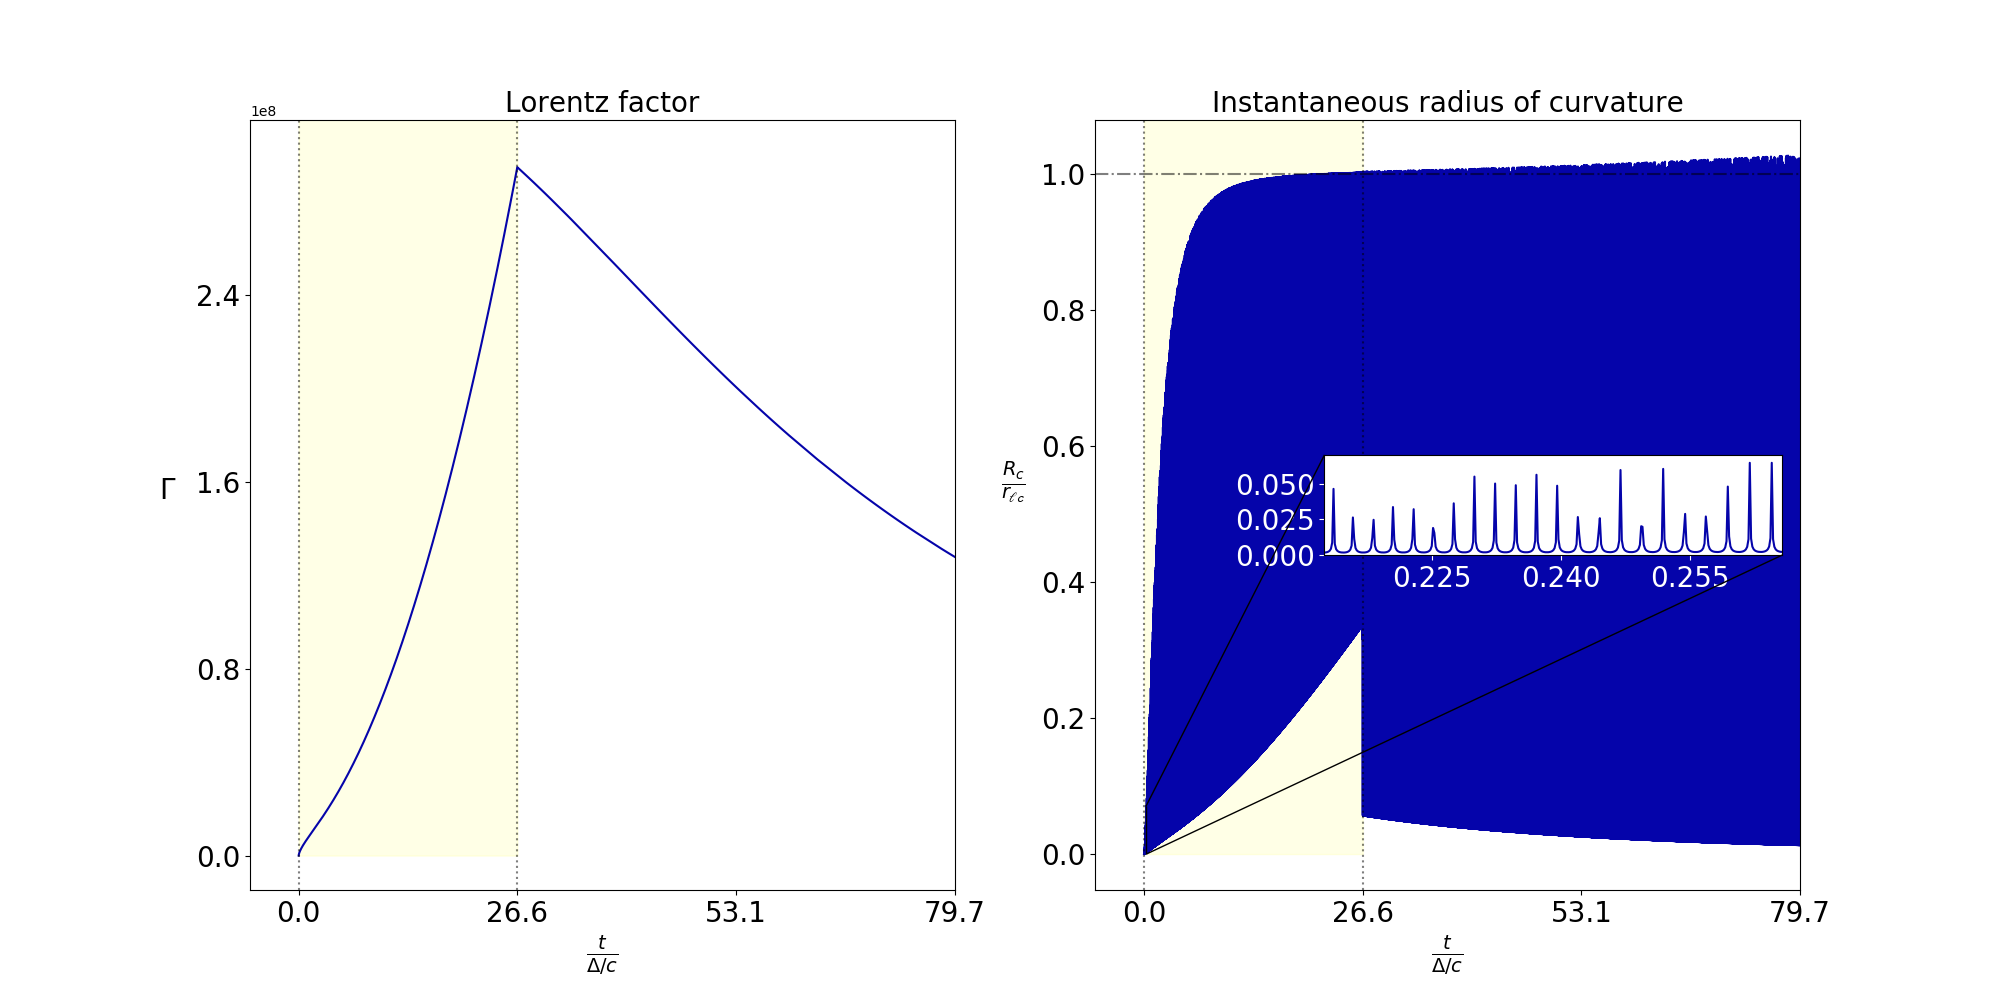

In [19]:
#Lorentz factor and radius of curvature
fig1, (ax3,ax4) = plt.subplots(1,2, figsize = (20,10))

ax3.plot(t/Delta, sfc.gamma(ur[0], uphi[0], uz_cyl[0]), 
                         color = pos_col)

ax3.set_xlim(xmax = 3*t_exit/Delta)
ax3.set_ylim(ymax = 3.15*10**8)


ax3.set_xlabel('$\\frac{{t}}{{\Delta/c}}$', fontsize = label_fs) 
ax3.set_ylabel('$\Gamma$', fontsize = label_fs, rotation = 0, labelpad = 20)
ax3.set_title('Lorentz factor', fontsize = title_fs)

ax3.xaxis.set_tick_params(labelsize = tick_fs)
ax3.xaxis.set_major_locator(plt.MultipleLocator(t_exit/Delta))
ax3.yaxis.set_tick_params(labelsize = tick_fs)
ax3.yaxis.set_major_locator(plt.MaxNLocator(5))

ax3.axvline(x = t_exit/Delta, linestyle = ':', color = bound_color, alpha = 0.5)
ax3.axvline(x = 0, linestyle = ':', color = bound_color, alpha = 0.5)


# ax3.text(-0.15*t_exit/Delta, 0.1*10**8, '$t_{{enter}}$', fontsize = text_fs)

# ax3.text(1.05*t_exit/Delta, 0.1*10**8, '$t_{{exit}}$', fontsize = text_fs)

In [20]:
ax3.fill_between(t[:exit_index]/Delta, 0.35*10**9, color = fill_color, alpha = 0.2)

In [21]:
ax4.plot(t/Delta, r_curv[0]/Rlc, c = pos_col)

ax4.set_xlim(xmax = 3*t_exit/Delta)
ax4.set_ylim(ymax = 1.08)

ax4.set_xlabel('$\\frac{{t}}{{\Delta/c}}$', fontsize = label_fs)
ax4.set_ylabel('$\\frac{R_c}{r_\mathcal{{\ell c}}}$', fontsize = label_fs, rotation = 0, labelpad = 20) 
ax4.set_title('Instantaneous radius of curvature', fontsize = title_fs)

ax4.xaxis.set_tick_params(labelsize = tick_fs)
ax4.yaxis.set_tick_params(labelsize = tick_fs)
ax4.xaxis.set_major_locator(plt.MultipleLocator(t_exit/Delta))

In [22]:
axins4 = inset_axes(ax4, width="65%", 
                        height=1., 
                        loc='center', bbox_to_anchor = (0.15, -0.0, 1, 1), bbox_transform = ax4.transAxes)
axins4.plot(t/Delta, r_curv[0]/Rlc, color = pos_col, zorder = 0)
x1, x2, y1, y2 = 0.008*t_exit/Delta, 0.010*t_exit/Delta, 0, 0.07
axins4.set(xlim = [x1, x2], ylim = [y1, y2])
axins4.xaxis.set_major_locator(plt.MaxNLocator(5))
axins4.yaxis.set_major_locator(plt.MaxNLocator(3))
axins4.xaxis.set_tick_params(labelsize = tick_fs, colors = 'w')
axins4.yaxis.set_tick_params(labelsize = tick_fs, colors = 'w')
mark_inset(ax4, axins4, loc1=2, loc2=4, fc="k", ec="k", zorder = 10)

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x7fd97df99400>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x7fd97df99cf8>)

In [23]:
ax4.axhline(y = 1., linestyle = '-.', c = bound_color, alpha = 0.5)
ax4.axvline(x = t_exit/Delta, ls = ':', c = bound_color, alpha = 0.5)
ax4.axvline(x = 0., ls = ':', c = bound_color, alpha = 0.5)

ax4.fill_between(t[:exit_index]/Delta, 1.1, color = fill_color, alpha = 0.2)

In [24]:
plt.savefig('positron_gamma_and_rcurv.png')